### Edgar Moises Hernandez-Gonzalez
#### 27/11/19-10/02/20
#### Clasificacion de imagenes motoras en EEG con ConvLSTM2D
##### Caracteristicas = alfa de C3 y C4
##### 5 ejecuciones independientes

##### Sujeto 1
##### Accuracy = 37.85%
##### Kappa = 0.1713

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 510)
(288, 510)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 5D
x_train = x_train.reshape((n_samples_train, 1, 1, 2, 255))
x_test = x_test.reshape((n_samples_test, 1, 1, 2, 255))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1, 2, 255)
(288, 1, 1, 2, 255)


In [9]:
x_train = np.transpose(x_train, (0,1,2,4,3))
x_test = np.transpose(x_test, (0,1,2,4,3))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1, 255, 2)
(288, 1, 1, 255, 2)


In [0]:
def Conv_LSTM_2D():
  model = Sequential()
  model.add(ConvLSTM2D(64, (1,7), activation='relu', input_shape=x_train.shape[1:]))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-3)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
288/288 - 0s - loss: 8.7061 - acc: 0.3368
kappa:  0.1157407407407407
f1: 0.3330797545847253
confusion matrix:
 [[21 23 19  9]
 [25 22 16  9]
 [11  8 34 19]
 [11  6 35 20]]


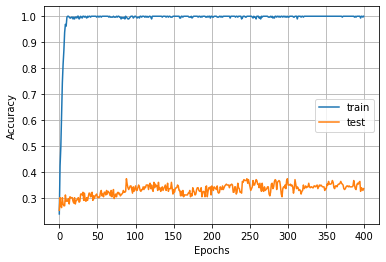

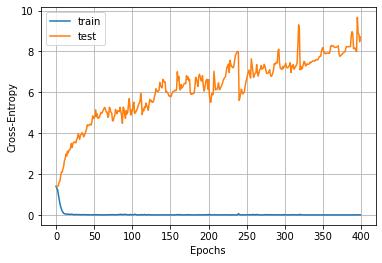

Iteration: 2
288/288 - 0s - loss: 9.7482 - acc: 0.3576
kappa:  0.1435185185185185
f1: 0.3595409770337119
confusion matrix:
 [[24 32  9  7]
 [28 31 10  3]
 [22  4 22 24]
 [17  9 20 26]]


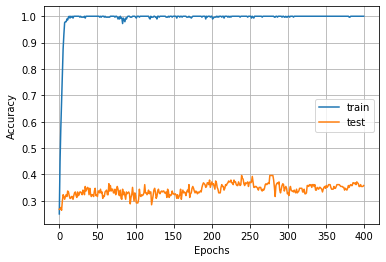

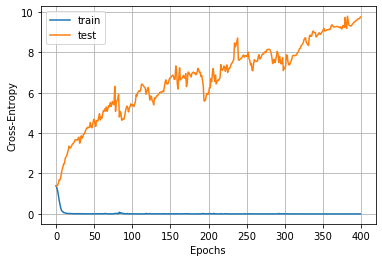

Iteration: 3
288/288 - 0s - loss: 7.2688 - acc: 0.3021
kappa:  0.06944444444444442
f1: 0.3016017602747675
confusion matrix:
 [[23 26 14  9]
 [36 20 10  6]
 [17  6 26 23]
 [14 14 26 18]]


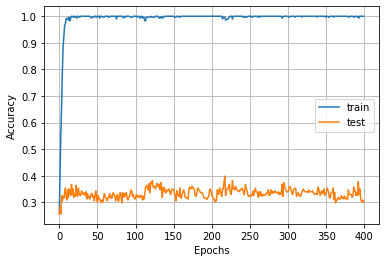

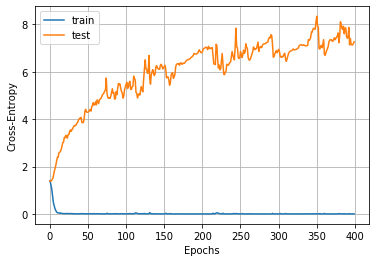

Iteration: 4
288/288 - 0s - loss: 6.9281 - acc: 0.3785
kappa:  0.17129629629629628
f1: 0.37365866659843583
confusion matrix:
 [[17 28 15 12]
 [15 34 13 10]
 [ 9 11 27 25]
 [ 8  7 26 31]]


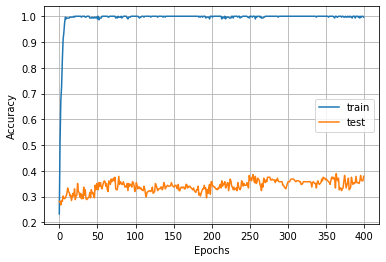

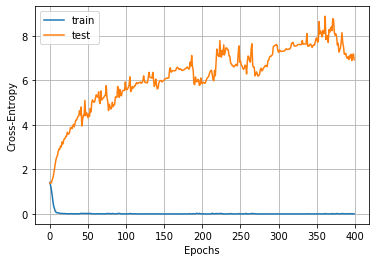

Iteration: 5
288/288 - 0s - loss: 7.6167 - acc: 0.3438
kappa:  0.125
f1: 0.34383687606615654
confusion matrix:
 [[21 33  8 10]
 [33 25  7  7]
 [10 10 23 29]
 [10 11 21 30]]


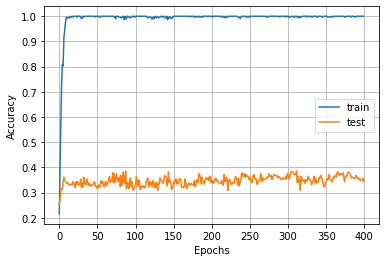

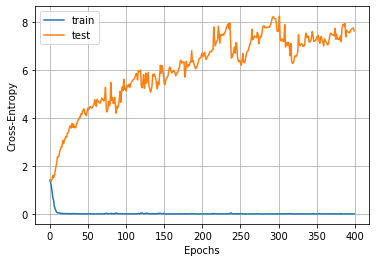


Resultados:
loss: [8.706097602844238, 9.748209635416666, 7.268786589304606, 6.928104241689046, 7.616658316718207]
accuracy: [0.33680555, 0.3576389, 0.30208334, 0.3784722, 0.34375]
kappa: [0.1157407407407407, 0.1435185185185185, 0.06944444444444442, 0.17129629629629628, 0.125]
f1: [0.3330797545847253, 0.3595409770337119, 0.3016017602747675, 0.37365866659843583, 0.34383687606615654]


In [11]:
array_loss = []
array_acc = []
array_kappa = []
array_f1 = []
for i in range(5):
    print("Iteration:", i+1);
    
    model = Conv_LSTM_2D()

    history = model.fit(x_train, y_train, epochs=400, batch_size=18,
                        validation_data=(x_test, y_test), verbose=0)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    array_loss.append(test_loss)
    array_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    
    kappa = cohen_kappa_score(y_test, y_pred)
    array_kappa.append(kappa)
    print("kappa: ", kappa)

    f1 = f1_score(y_test, y_pred, average='macro')
    array_f1.append(f1)
    print("f1:", f1)
    
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)
print("f1:", array_f1)

In [12]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_4 (ConvLSTM2D)  (None, 1, 249, 64)        118528    
_________________________________________________________________
dropout_8 (Dropout)          (None, 1, 249, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 15936)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                1019968   
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 260       
Total params: 1,138,756
Trainable params: 1,138,756
Non-trainable params: 0
____________________________________________

In [14]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("Mean F1: %.4f" % np.mean(array_f1))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))
print("Max F1: %.4f" % np.max(array_f1))

Mean Accuracy: 0.3438
Mean Kappa: 0.1250
Mean F1: 0.3423
Max Accuracy: 0.3785
Max Kappa: 0.1713
Max F1: 0.3737
